<a href="https://colab.research.google.com/github/appliedcode/mthree-c422/blob/mthree-c422-dipti/Exercises/day-8/Vectorization/News%20Headlines%20NLP%20Lab_%20Bag-of-Words%20and%20Document.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#News Headlines NLP Lab: Bag-of-Words and Document Similarity

##Objective
Analyze a collection of news headlines by building a Bag-of-Words representation to extract features, explore word frequency, and compute document similarity.


###Dataset
Use the following list of news headlines:

headlines = [
    "AI outperforms doctors in diagnosing rare diseases",

    "Stock markets hit new record highs amid global optimism",
    "New vaccine shows promise in early trials",
    "Climate change impacts agriculture across multiple continents",
    "Scientists develop biodegradable plastic from seaweed",
    "Sports teams adapt strategies with big data analytics",
    "Electric vehicles set new sales record worldwide",
    "Breakthrough in quantum computing boosts encryption security"
]


###Tasks
**Preprocessing**

Write a function to lowercase all text, remove punctuation, and normalize whitespace in each headline.

**Bag-of-Words Analysis**

Use scikit-learn’s CountVectorizer with stop word removal and vocabulary limited to 50 words.

Fit and transform the preprocessed headlines into a Bag-of-Words matrix.

Display the vocabulary, shape, and sparsity of the matrix.

**Word Frequency and Visualization**

Compute total word frequency across all headlines.

Plot the top 10 most frequent words using matplotlib or seaborn.

**Document Similarity**

Calculate cosine similarity between headline vectors.

Display the similarity matrix in tabular form.

Identify the two most similar headlines and explain their similarity based on
shared vocabulary.

##Deliverables
A notebook implementing the preprocessing function and Bag-of-Words construction.

Printed output showing vocabulary and matrix characteristics.

A bar chart of the top 10 words by frequency.

A similarity matrix with highlighted most similar headline pairs.

A short commentary explaining the results.

This exercise provides hands-on experience with core NLP techniques including text cleaning, feature extraction via Bag-of-Words, and comparing documents using cosine similarity on vectorized features.

In [1]:
!pip install --quiet scikit-learn seaborn


In [2]:
headlines = [
    "AI outperforms doctors in diagnosing rare diseases",
    "Stock markets hit new record highs amid global optimism",
    "New vaccine shows promise in early trials",
    "Climate change impacts agriculture across multiple continents",
    "Scientists develop biodegradable plastic from seaweed",
    "Sports teams adapt strategies with big data analytics",
    "Electric vehicles set new sales record worldwide",
    "Breakthrough in quantum computing boosts encryption security"
]


In [3]:
import re

def preprocess(text):
    text = text.lower()
    text = re.sub(r"[^\w\s]", "", text)  # remove punctuation
    text = re.sub(r"\s+", " ", text)     # normalize whitespace
    return text.strip()

cleaned_headlines = [preprocess(h) for h in headlines]
print(cleaned_headlines)


['ai outperforms doctors in diagnosing rare diseases', 'stock markets hit new record highs amid global optimism', 'new vaccine shows promise in early trials', 'climate change impacts agriculture across multiple continents', 'scientists develop biodegradable plastic from seaweed', 'sports teams adapt strategies with big data analytics', 'electric vehicles set new sales record worldwide', 'breakthrough in quantum computing boosts encryption security']


In [4]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english', max_features=50)
X = vectorizer.fit_transform(cleaned_headlines)

# Vocabulary
vocab = vectorizer.get_feature_names_out()
print("Vocabulary:", vocab)

# Matrix shape and sparsity
print("BoW Matrix shape:", X.shape)
print("Sparsity: {:.2f}%".format(100.0 * (1.0 - X.nnz / (X.shape[0] * X.shape[1]))))


Vocabulary: ['adapt' 'agriculture' 'ai' 'amid' 'analytics' 'big' 'biodegradable'
 'boosts' 'breakthrough' 'change' 'climate' 'computing' 'continents'
 'data' 'develop' 'diagnosing' 'diseases' 'doctors' 'early' 'electric'
 'encryption' 'global' 'highs' 'hit' 'impacts' 'markets' 'multiple' 'new'
 'optimism' 'outperforms' 'plastic' 'promise' 'quantum' 'rare' 'record'
 'sales' 'scientists' 'seaweed' 'security' 'set' 'shows' 'sports' 'stock'
 'strategies' 'teams' 'trials' 'vaccine' 'vehicles' 'worldwide']
BoW Matrix shape: (8, 49)
Sparsity: 86.73%


/tmp/ipython-input-811330242.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette='viridis')


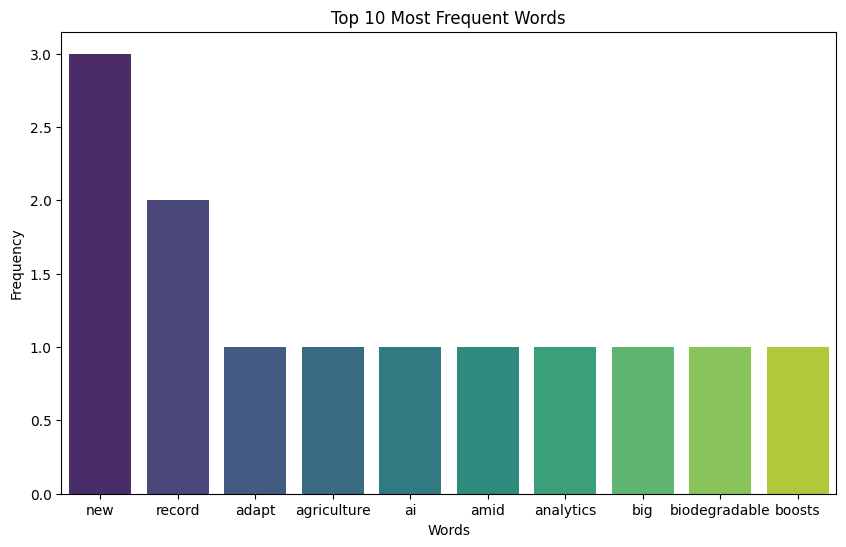

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Total frequency
word_counts = np.asarray(X.sum(axis=0)).flatten()
word_freq = dict(zip(vocab, word_counts))

# Top 10 words
top_words = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:10]
words, counts = zip(*top_words)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=list(words), y=list(counts), palette='viridis')
plt.title("Top 10 Most Frequent Words")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()


In [6]:
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

similarity_matrix = cosine_similarity(X)

# Create a DataFrame for display
sim_df = pd.DataFrame(similarity_matrix, index=range(1,9), columns=range(1,9))
print("Cosine Similarity Matrix:\n")
print(sim_df.round(2))


Cosine Similarity Matrix:

     1     2     3    4    5    6     7    8
1  1.0  0.00  0.00  0.0  0.0  0.0  0.00  0.0
2  0.0  1.00  0.14  0.0  0.0  0.0  0.25  0.0
3  0.0  0.14  1.00  0.0  0.0  0.0  0.15  0.0
4  0.0  0.00  0.00  1.0  0.0  0.0  0.00  0.0
5  0.0  0.00  0.00  0.0  1.0  0.0  0.00  0.0
6  0.0  0.00  0.00  0.0  0.0  1.0  0.00  0.0
7  0.0  0.25  0.15  0.0  0.0  0.0  1.00  0.0
8  0.0  0.00  0.00  0.0  0.0  0.0  0.00  1.0


In [7]:
import numpy as np

# Ignore diagonal
np.fill_diagonal(similarity_matrix, 0)
max_sim_idx = np.unravel_index(np.argmax(similarity_matrix), similarity_matrix.shape)

print(f"\nMost similar headlines are:")
print(f"[{max_sim_idx[0]+1}]: {headlines[max_sim_idx[0]]}")
print(f"[{max_sim_idx[1]+1}]: {headlines[max_sim_idx[1]]}")



Most similar headlines are:
[2]: Stock markets hit new record highs amid global optimism
[7]: Electric vehicles set new sales record worldwide
